In [1]:
#impoer the liberies
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from bdshare import get_basic_hist_data
plt.style .use('fivethirtyeight')

In [2]:
Top30=pd.DataFrame(pd.read_html('https://www.dsebd.org/dse30_share.php')[375])
List=Top30['TRADING CODE'].to_list()

In [3]:
trend_analysis=[]
tickers=[]
for ticker in Top30['TRADING CODE'].values:
    print(ticker)
    df=get_basic_hist_data('2020-01-1','2022-10-16',ticker,index='date')
    df=df[~(df.open<=0)]
    df['Adjustment']=(df['open']+df['close'])/2
    date=pd.to_datetime(df.index)
    df.set_index(date, inplace=True)
    df.asfreq('D')
    #df[['open','close','Adjustment']][0:10].plot()
    stl=STL(df['Adjustment'],period=40)
    Result = stl.fit()
    trend=Result.trend
    df['Trend']=trend
    df['pct_change']=trend.pct_change()
    last_trend=float(trend.pct_change()[-1:][0])
    tickers.append(ticker)
    trend_analysis.append(last_trend)
    print('Finish')

BATBC
Finish
BBSCABLES
Finish
BEACONPHAR
Finish
BEXIMCO
Finish
BRACBANK
Finish
BSCCL
Finish
BSRMLTD
Finish
BXPHARMA
Finish
CITYBANK
Finish
DELTALIFE
Finish
EBL
Finish
FORTUNE
Finish
GP
Finish
GPHISPAT
Finish
IDLC
Finish
ISLAMIBANK
Finish
LANKABAFIN
Finish
LHBL
Finish
MPETROLEUM
Finish
OLYMPIC
Finish
ORIONPHARM
Finish
POWERGRID
Finish
PUBALIBANK
Finish
RENATA
Finish
ROBI
Finish
SINGERBD
Finish
SQURPHARMA
Finish
SUMITPOWER
Finish
TITASGAS
Finish
UPGDCL
Finish


In [4]:
trend_analysis=pd.DataFrame({'Tickers':tickers,'Last_trend':trend_analysis})
trend_analysis

,Tickers,Last_trend
0,BATBC,-0.000111
1,BBSCABLES,0.001726
2,BEACONPHAR,0.006469
3,BEXIMCO,0.002544
4,BRACBANK,-0.000274
5,BSCCL,0.000565
6,BSRMLTD,0.000754
7,BXPHARMA,0.002869
8,CITYBANK,0.000614
9,DELTALIFE,0.000723


In [5]:
trend_analysis.sort_values(by=['Last_trend'],ascending=False)[0:29]

,Tickers,Last_trend
20,ORIONPHARM,0.009163
2,BEACONPHAR,0.006469
7,BXPHARMA,0.002869
3,BEXIMCO,0.002544
17,LHBL,0.002364
1,BBSCABLES,0.001726
22,PUBALIBANK,0.001440
14,IDLC,0.000888
13,GPHISPAT,0.000867
6,BSRMLTD,0.000754


In [6]:
t='GPHISPAT'#'*DELTALIFE'#'*BSCCL'#'*CITYBANK'#'*POWERGRID'#'ISLAMIBANK'#'OLYMPIC'#'BSRMLTD'#'IDLC'#'PUBALIBANK'#'BEXIMCO'#'BXPHARMA'#'LHBL'#
df=get_basic_hist_data('2020-01-1','2022-10-16',t,index='date')
df=df[~(df.open<=0)]
df['Adjustment']=(df['open']+df['close'])/2
date=pd.to_datetime(df.index)
df.set_index(date, inplace=True)
df.asfreq('D')
stl_40=STL(df['Adjustment'],period=40)
Result_40= stl_40.fit()
trend_40=Result_40.trend
df['Trend_40']=trend_40
df['pct_change_40']=trend_40.pct_change()
stl_14=STL(df['Adjustment'],period=10)
Result_14= stl_14.fit()
trend_14=Result_14.trend
df['Trend_14']=trend_14
df['pct_change_14']=trend_14.pct_change()
df

,open,high,low,close,volume,Adjustment,Trend_40,pct_change_40,Trend_14,pct_change_14
date,,,,,,,,,,
2020-10-18,29.7,29.7,28.1,28.5,303094,29.10,25.651281,NaN,28.258085,NaN
2020-10-19,28.4,28.4,27.2,28.0,208959,28.20,25.708223,0.002220,28.118432,-0.004942
2020-10-20,28.0,29.4,28.0,28.4,208852,28.20,25.766193,0.002255,27.981975,-0.004853
2020-10-21,28.5,29.3,28.2,28.5,403065,28.50,25.825203,0.002290,27.849290,-0.004742
2020-10-22,28.4,28.4,27.5,28.0,173002,28.20,25.885248,0.002325,27.720999,-0.004607
...,...,...,...,...,...,...,...,...,...,...
2022-10-10,49.9,49.9,47.5,47.8,1278489,48.85,51.836111,0.000888,48.886144,-0.005186
2022-10-11,48.0,49.1,47.7,47.8,706702,47.90,51.881909,0.000884,48.629444,-0.005251
2022-10-12,47.8,48.5,47.5,48.0,1217222,47.90,51.927482,0.000878,48.370809,-0.005318


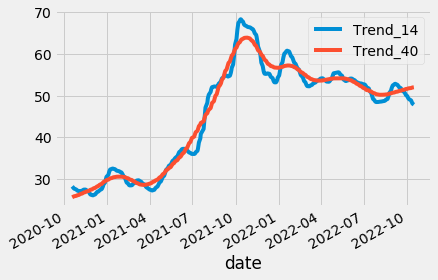

In [7]:
df[['Trend_14','Trend_40']].plot()

In [8]:
Sell=df[(df.pct_change_40>=df[df['pct_change_40']<0]['pct_change_14'].min())&(df.Trend_14>df.Trend_40)&(df.Trend_14<=df.Adjustment)&(df.pct_change_14<=-0.0001)]
Buy=df[(df.pct_change_40>=df[df['pct_change_40']<0]['pct_change_14'].min())&(df.Trend_14<df.Trend_40)&(df.Trend_14>=df.Adjustment)&(df.pct_change_14>=0)]
Sell

,open,high,low,close,volume,Adjustment,Trend_40,pct_change_40,Trend_14,pct_change_14
date,,,,,,,,,,
2020-10-19,28.4,28.4,27.2,28.0,208959,28.20,25.708223,0.002220,28.118432,-0.004942
2020-10-20,28.0,29.4,28.0,28.4,208852,28.20,25.766193,0.002255,27.981975,-0.004853
2020-10-21,28.5,29.3,28.2,28.5,403065,28.50,25.825203,0.002290,27.849290,-0.004742
2020-10-22,28.4,28.4,27.5,28.0,173002,28.20,25.885248,0.002325,27.720999,-0.004607
2020-10-25,28.0,28.0,27.0,27.2,191736,27.60,25.946313,0.002359,27.597468,-0.004456
...,...,...,...,...,...,...,...,...,...,...
2022-09-08,53.0,54.0,52.6,52.8,2068697,52.90,50.929053,0.000829,52.747875,-0.001684
2022-09-13,53.1,53.3,52.1,52.4,915839,52.75,51.058073,0.000851,52.283805,-0.003172
2022-09-14,53.0,53.0,51.2,51.4,908038,52.20,51.101914,0.000859,52.128677,-0.002967


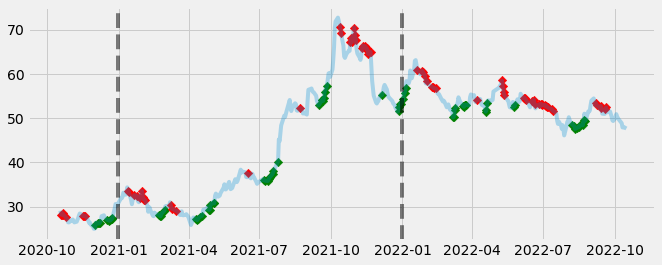

In [9]:
plt.figure(figsize=(10,4))
plt.plot(np.array(df.index),df['Adjustment'].values,alpha=0.3)
for year in range(2020,2022):
    plt.axvline(pd.to_datetime(str(year)+'-12-31'), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(np.array(Buy.index),Buy['Adjustment'].values, color='g', marker='D')
plt.scatter(np.array(Sell.index),Sell['Adjustment'].values, color='R', marker='D')


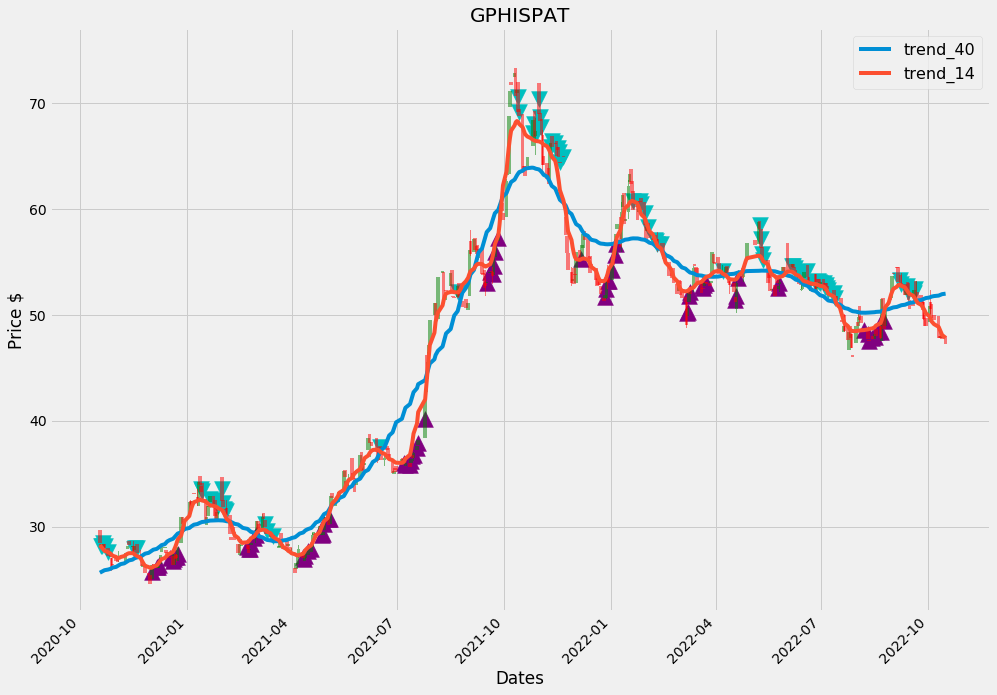

In [10]:
#create figure
x='2020-10-15'
y='2022-10-16'
plt.figure(figsize=(15,10))
df1=df.sort_index().loc[x:y]
Buy1=Buy.sort_index().loc[x:y]
Sell1=Sell.sort_index().loc[x:y]

#define width of candlestick elements
width = 3
width2 = 0.1

#define up and down prices
up = df1[df1.close>=df1.open]
down = df1[df1.close<df1.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1,alpha=0.5)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1,alpha=0.5)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1,alpha=0.5)

#plot down priceo
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2,alpha=0.5)
plt.bar(down.index,down.high-down.close,width2,bottom=down.close,color=col2,alpha=0.5)
plt.bar(down.index,down.low-down.open,width2,bottom=down.open,color=col2,alpha=0.5)

#
plt.plot(np.array(df1.index),df1.Trend_40.values,label='trend_40')
#plt.plot(np.array(df1.index),df1.Adjustment.values,label='Adjusted',color='y')
plt.plot(np.array(df1.index),df1.Trend_14.values,label='trend_14')

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')
plt.scatter(np.array(Buy1.index),Buy1['Adjustment'].values, color='purple', marker='^',s=250)
plt.scatter(np.array(Sell1.index),Sell1['Adjustment'].values, color='c', marker='v',s=250)
#display candlestick chart
plt.title(t)
plt.xlabel('Dates')
plt.ylabel('Price $')
plt.legend(fontsize=16)
plt.show()